# Word embedding practice and notes

## 2 ways to obtain word embeddings:

# # Method 1:

In [1]:
# Learn word embeddings jointly with the main task you care about (document classification or segment prediction)
# In this setup, you start with random vectors and then learn word vectors in the same way you learn the weights 
# of a neural network

# # Method 2:

In [2]:
# Load into your model word embeddings that were precomputed using a different machine-learning task than the one 
# you are trying to solve. These are call pretrained word embeddings

# # learn a new embedding space with a new task

In [5]:
#Instiatiing an embedding layer
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64) # The Embedding layer takes at least two arguments: the number of possible
                                      # tokens (here, 1,000: 1 + maximum word index) and the dimensionality of the
                                      # of the embeddings (here, 64)  

# Task: IMDB movie review sentiment-prediction using 10,000 most common
# words and cutting the reviews after only 20 words

In [22]:
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

max_features = 10000 # Number of words to consider as features
maxlen = 20 #cuts off the text after this number of words (among the #max_features most common words)

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words = max_features) # Loads the data as lists of integers

x_train = pad_sequences(x_train, maxlen=maxlen) # turns the list of integers into a 2D 
                                                # integers tensor of shape (samples, maxlen) 
x_test = pad_sequences(x_train, maxlen=maxlen)

In [11]:
#Using an embedding layer and classifier on the IMDB data

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) # Specificies the maximum input length to the embedding
# layer so you can later flatten the embedded inouts. After the Embedding layer, the activations have shape
# (samples, maxlen, 8)
model.add(Flatten()) # Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen*8)

model.add(Dense(1, activation = 'sigmoid')) # adds classifier on top
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary

2023-09-30 17:49:20.950069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa55de4ffa0>>

In [12]:
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 1s 874us/step - loss: 0.6559 - accuracy: 0.6416 - val_loss: 0.5936 - val_accuracy: 0.7122
Epoch 2/10
625/625 [==============================] - 0s 672us/step - loss: 0.5235 - accuracy: 0.7556 - val_loss: 0.5182 - val_accuracy: 0.7380
Epoch 3/10
625/625 [==============================] - 0s 668us/step - loss: 0.4552 - accuracy: 0.7880 - val_loss: 0.4964 - val_accuracy: 0.7500
Epoch 4/10
625/625 [==============================] - 0s 669us/step - loss: 0.4208 - accuracy: 0.8081 - val_loss: 0.4922 - val_accuracy: 0.7546
Epoch 5/10
625/625 [==============================] - 0s 671us/step - loss: 0.3966 - accuracy: 0.8217 - val_loss: 0.4910 - val_accuracy: 0.7574
Epoch 6/10
625/625 [==============================] - 0s 677us/step - loss: 0.3764 - accuracy: 0.8322 - val_loss: 0.4945 - val_accuracy: 0.7584
Epoch 7/10
625/625 [==============================] - 0s 745us/step - loss: 0.3584 - accuracy: 0.8431 - val_loss: 0.4987 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

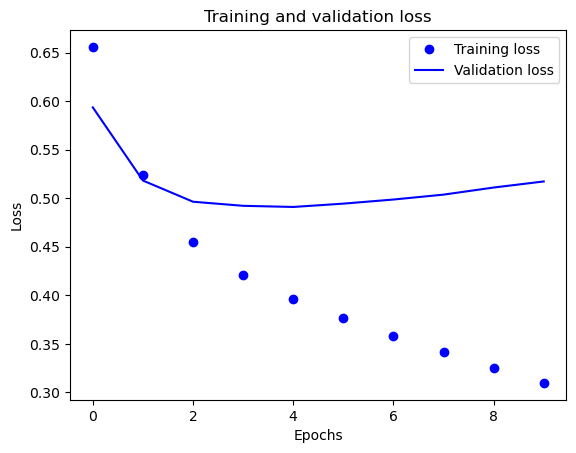

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(10)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

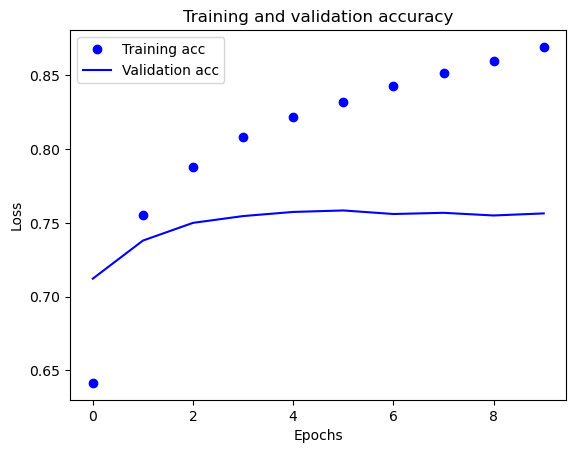

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [1]:
# Results in a model that reaches a validation accuracy of 76%. It would be much more accurate if, instead of 1
# simple embedding layer that doesn't understand inter-word relationships and sentence-sentence structure, we
# added recurrent layers or 1d convolution layers pn top of the embedded sequences to understand to learn features
# that take into account each sequence as a whole

# Processing the labels of the raw IMDB data

In [39]:
#/Users/laolucharles1/Downloads

import os
imdb_dir = '/Users/laolucharles1/Downloads/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = [] # a list of the labels of the text documents
texts = [] # A list of all the text documents
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

# Tokenizing the text of the raw IMDB data

In [40]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples

max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen) 
#turns the list of integers into a 2D integers tensor of shape (samples, maxlen) 

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


# Parsing the GloVe word embeddings file

In [41]:
glove_dir = '/Users/laolucharles1/Downloads/glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


# Building an embedding matrix that we will be able to load into an Embedding layer.

In [42]:
embedding_dim = 100


embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [43]:
# model Definition

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_14 (Dense)            (None, 32)                320032    
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#  Loading the matrix of pre-trained word embeddings into the Embedding layer

In [44]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Training and evaluation

In [45]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 60ms/step - loss: 2.2809 - acc: 0.5000 - val_loss: 0.6930 - val_acc: 0.5278
Epoch 2/10
7/7 [==============================] - 0s 47ms/step - loss: 0.6137 - acc: 0.6350 - val_loss: 0.7901 - val_acc: 0.5016
Epoch 3/10
7/7 [==============================] - 0s 45ms/step - loss: 0.6341 - acc: 0.6650 - val_loss: 0.6973 - val_acc: 0.5342
Epoch 4/10
7/7 [==============================] - 0s 45ms/step - loss: 0.4550 - acc: 0.7550 - val_loss: 0.6906 - val_acc: 0.5762
Epoch 5/10
7/7 [==============================] - 0s 44ms/step - loss: 0.3556 - acc: 0.8450 - val_loss: 0.8939 - val_acc: 0.5168
Epoch 6/10
7/7 [==============================] - 0s 44ms/step - loss: 0.1681 - acc: 0.9450 - val_loss: 0.7363 - val_acc: 0.5654
Epoch 7/10
7/7 [==============================] - 0s 45ms/step - loss: 0.1276 - acc: 0.9700 - val_loss: 1.5432 - val_acc: 0.4999
Epoch 8/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0957 - acc: 0.9650 - val

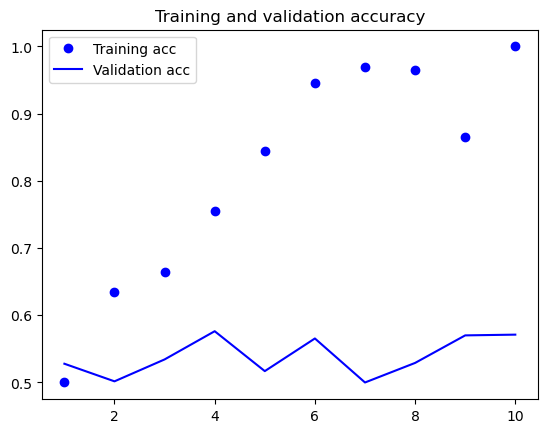

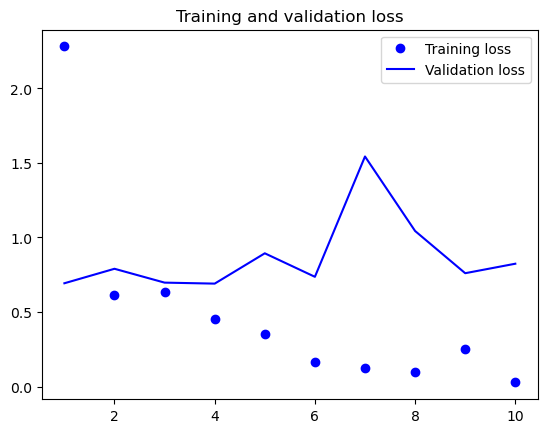

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
#The model quickly starts overfitting, unsurprisingly given the small
# number of training samples. Validation accuracy has no variance 
# and reaches a high of 50%.

# Defining a training the same model without pre-trained word embeddings

In [48]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_8 (Flatten)         (None, 10000)             0         
                                                                 
 dense_16 (Dense)            (None, 32)                320032    
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 63ms/step - loss: 0.6988 - acc: 0.4500 - val_loss: 0.6919 - val_acc: 0.5228
Epoch 2/10
7/7 [==============================] - 0s 54ms/step - loss: 0.5097 - acc: 1.0000 - val_loss: 0.6947 - val_acc: 0.5231
Epoch 3/10
7/7 [==============================] - 0s 49ms/step - loss: 0.2868 - acc: 0.9950 - val_loss: 0.6971 - val_acc: 0.5294
Epoch 4/10
7/7 [==============================] - 0s 51ms/step - loss: 0.1254 - acc: 0.9950 - val_loss: 0.7000 - val_acc: 0.5299
Epoch 5/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0549 - acc: 1.0000 - val_loss: 0.7175 - val_acc: 0.5305
Epoch 6/10
7/7 [==============================] - 0s 52ms/step - loss: 0.0290 - acc: 1.0000 - val_loss: 0.7314 - val_acc: 0.5290
Epoch 7/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0156 - acc: 1.0000 - val_loss: 0.7300 - val_acc: 0.5321
Epoch 8/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0089 - acc: 1.0000 - val

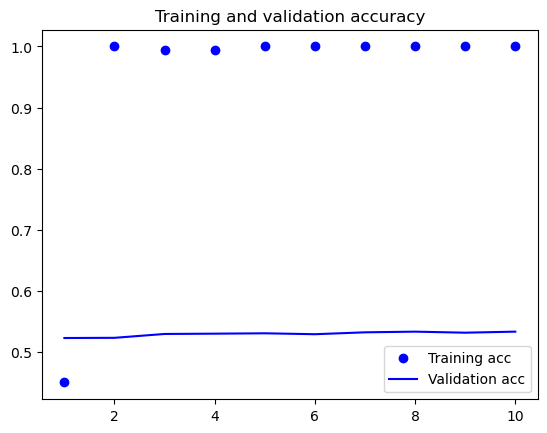

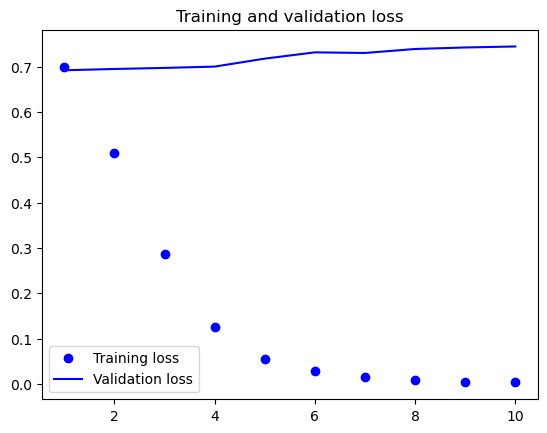

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
# Overfitting galore when not using pretrained model. If we increased
# the number of training samples then the non-pretrained model we be 
# than the pretrained model. We used such a small amount of training
# samples that the pretrained model is the better choice

# Finally, let’s evaluate the model on the test data. First, we will need to tokenize the test data:

In [52]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [53]:
model.load_weights('pre_trained_glove_model.h5')
# model.evaluate(x_test, y_test)

In [54]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 824us/step - loss: 0.8481 - acc: 0.5620


[0.8480592370033264, 0.561959981918335]

# We get an appalling test accuracy of 56%. Working with just a handful of training samples is hard!